Devlop a simple image encryption tool using pixel manipulation, Support operations like swaaping pixel values or applying a basic mathematical operation

In [ ]:
from PIL import Image
import os

def encrypt_image(input_path, output_path, operation_mode, key=None):
    """Encrypts an image based on the selected mode."""
    try:
        img = Image.open(input_path).convert("RGB")
        width, height = img.size
        pixels = img.load()
        print(f"Encrypting image using '{operation_mode}'...")

        for y in range(height):
            for x in range(width):
                r, g, b = pixels[x, y]
                new_r, new_g, new_b = r, g, b
                if operation_mode == "swap_rg":
                    new_r, new_g, new_b = g, r, b
                elif operation_mode == "add_key":
                    k = key if key is not None else 50
                    new_r = (r + k) % 256
                    new_g = (g + k) % 256
                    new_b = (b + k) % 256

                pixels[x, y] = (new_r, new_g, new_b)

        img.save(output_path)
        print(f"Encryption successful! Saved to {output_path}")

    except FileNotFoundError:
        print(f"Error: Input file not found at {input_path}")
    except Exception as e:
        print(f"An error occurred: {e}")


def decrypt_image(input_path, output_path, operation_mode, key=None):
    try:
        img = Image.open(input_path).convert("RGB")
        width, height = img.size
        pixels = img.load()

        print(f"Decrypting image using inverse of '{operation_mode}'...")

        for y in range(height):
            for x in range(width):
                r, g, b = pixels[x, y]
                new_r, new_g, new_b = r, g, b

                if operation_mode == "swap_rg":
                    new_r, new_g, new_b = g, r, b

                elif operation_mode == "add_key":
                    k = key if key is not None else 50
                    new_r = (r - k + 256) % 256
                    new_g = (g - k + 256) % 256
                    new_b = (b - k + 256) % 256

                pixels[x, y] = (new_r, new_g, new_b)

        img.save(output_path)
        print(f"Decryption successful! Saved to {output_path}")

    except FileNotFoundError:
        print(f"Error: Input file not found at {input_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':

    INPUT_FILE = 'Comic1.jpg'

    if not os.path.exists(INPUT_FILE):
        print(f"!!! Please place an image named '{INPUT_FILE}' in the current directory to test the script. !!!")
    else:
        # --- TEST 1: Swap R and G Channels ---
        print("\n--- Running Swap R/G Test ---")
        encrypt_image(
            input_path=INPUT_FILE,
            output_path='encrypted_swap.png',
            operation_mode='swap_rg'
        )
        decrypt_image(
            input_path='encrypted_swap.png',
            output_path='decrypted_swap.png',
            operation_mode='swap_rg'
        )

        # --- TEST 2: Basic Mathematical Operation (Add 100) ---
        print("\n--- Running Add 100 Test ---")
        CUSTOM_KEY = 100
        encrypt_image(
            input_path=INPUT_FILE,
            output_path='encrypted_math.png',
            operation_mode='add_key',
            key=CUSTOM_KEY
        )
        decrypt_image(
            input_path='encrypted_math.png',
            output_path='decrypted_math.png',
            operation_mode='add_key',
            key=CUSTOM_KEY
        )


--- Running Swap R/G Test ---
Encrypting image using 'swap_rg'...
Encryption successful! Saved to encrypted_swap.png
Decrypting image using inverse of 'swap_rg'...
Decryption successful! Saved to decrypted_swap.png

--- Running Add 100 Test ---
Encrypting image using 'add_key'...
Encryption successful! Saved to encrypted_math.png
Decrypting image using inverse of 'add_key'...
Decryption successful! Saved to decrypted_math.png


Displaying encrypted_swap.png:


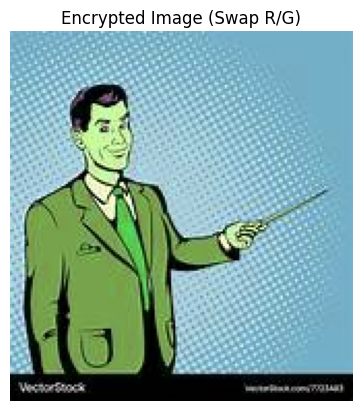


Displaying encrypted_math.png:


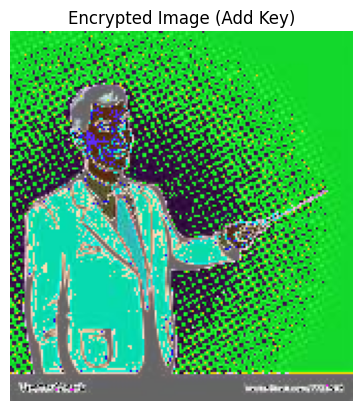

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

print("Displaying encrypted_swap.png:")
img_swap = Image.open('encrypted_swap.png')
plt.imshow(img_swap)
plt.title('Encrypted Image (Swap R/G)')
plt.axis('off')
plt.show()

print("\nDisplaying encrypted_math.png:")
img_math = Image.open('encrypted_math.png')
plt.imshow(img_math)
plt.title('Encrypted Image (Add Key)')
plt.axis('off')
plt.show()